In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,f1_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error

In [2]:
df=pd.read_csv("INR=X.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0


In [3]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0


In [5]:
df['Date'] = df['Date'].astype('int64') // 10**9 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1580083200,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,1580169600,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,1580256000,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,1580342400,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,1580428800,71.639999,71.639999,71.277496,71.639999,71.639999,0


<Axes: >

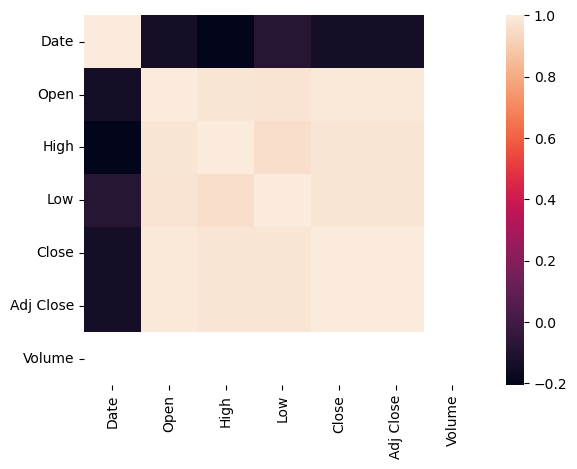

In [6]:
sns.heatmap(df.corr())

In [7]:

X = df[['Date']]  
y = df['Close'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [9]:
y_pred

array([73.99451091, 74.10997329, 74.18951404, 74.28188395, 74.64623191,
       74.39221467, 74.25365981, 73.94832595, 74.85406419, 74.47688708,
       74.80018175, 74.07405166, 74.71807517, 74.14332909, 74.1946457 ,
       73.97655009, 74.60261278, 74.86176169, 74.1356316 , 74.64366608,
       74.37938551, 74.35885887, 74.81814256, 74.12023661, 74.48458457,
       74.34346388, 74.60517862, 74.64110024, 74.55899366, 74.82840589,
       74.77452344, 74.19207987, 74.05609084, 74.49484789, 74.76682595,
       74.21773818, 74.62313943, 74.03043254, 74.13819743, 74.8463667 ,
       73.99194508, 74.720641  , 74.46405793, 74.61287611, 74.79248426,
       74.31523975, 74.05095918, 74.82070839, 74.57438865, 74.37681968,
       73.99964257, 74.27162062, 74.47945291])

In [10]:
y_test=np.array(y_test)
y_test

array([73.360001, 74.162399, 73.720001, 73.550697, 76.186302, 75.25    ,
       73.699303, 72.995903, 71.470001, 74.721001, 71.93    , 73.790298,
       75.400002, 73.953201, 73.647499, 73.169899, 75.485001, 71.314102,
       74.864998, 76.464996, 75.024803, 75.      , 72.110001, 74.419998,
       75.699997, 74.921799, 75.426201, 75.258499, 75.513199, 71.514801,
       73.9953  , 73.681297, 73.737999, 75.539803, 74.760002, 73.014801,
       76.151299, 73.839798, 74.57    , 71.515503, 73.445999, 75.464996,
       75.125   , 75.525002, 72.150002, 73.447899, 73.759804, 71.827499,
       76.110001, 75.099998, 73.32    , 73.534798, 75.454903])

In [11]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1.0797727942246769


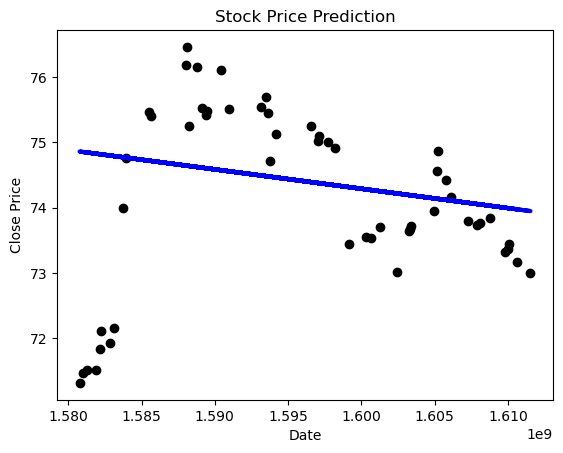

In [12]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [13]:
def prediction(model,date):
    date = pd.to_datetime(date).timestamp()
    price=model.predict([[date]])
    return price[0]

In [14]:
print("enter date  you want to predict:")
n='2021-03-27'
print("the predicted price is:",prediction(model,n))

enter date  you want to predict:
the predicted price is: 73.79181028159849


C:\Users\madhu sudhana reddy\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
